In [13]:
import pandas as pd, numpy as np
from fidap import fidap_client
import config

In [14]:
fidap = fidap_client(api_key=config.FIDAP_API_KEY)

Let's first explore the data and find some basic numbers here.

In [15]:
df2 = fidap.sql("""
    select insider_trades.ticker, insider_trades.filingdate, insider_trades.transactionshares,
    insider_trades.transactionvalue, daily.close, daily.fc_1m, daily.marketcap
    from insider_trades, tickers, daily
    where 
    insider_trades.ticker = tickers.ticker and 
    insider_trades.ticker = daily.ticker and
    insider_trades.filingdate = daily.date and
    insider_trades.transactionvalue > 100000 and 
    insider_trades.securitytitle = 'Common Stock'
""")

In [ ]:
ticker = "AAPL"

In [16]:
df2.head()

,ticker,filingdate,transactionshares,transactionvalue,close,fc_1m,marketcap
0,CMO,2016-02-03,13937,129893,9.47,0.033791,907500000.0
1,CMO,2016-02-03,24881,231891,9.47,0.033791,907500000.0
2,CMO,2016-02-03,17414,162298,9.47,0.033791,907500000.0
3,CMO,2016-02-03,11105,103499,9.47,0.033791,907500000.0
4,CMO,2018-01-04,43604,374994,8.66,-0.005774,832300000.0


In [5]:
len(df2)

276005

In [6]:
df2['mc_pct'] = df2['transactionvalue'] / (df2['marketcap']*1e6)

In [7]:
df2['sale'] = np.where(df2['transactionshares'] > 0, False, True)

In [8]:
df2

,ticker,filingdate,transactionshares,transactionvalue,close,fc_1m,marketcap,mc_pct,sale
0,CFFI,2018-08-20,-4353,270626,62.45,-0.081665,2.188000e+08,1.236865e-09,True
1,CFFI,2018-08-02,-8295,516364,61.90,0.012924,2.169000e+08,2.380655e-09,True
2,CFFI,2018-01-17,-1749,102491,58.65,-0.156010,2.046000e+08,5.009335e-10,True
3,CFFI,2018-01-17,-1748,102433,58.65,-0.156010,2.046000e+08,5.006500e-10,True
4,CFG,2017-03-27,-4164,143367,34.24,0.073890,1.743190e+10,8.224405e-12,True
...,...,...,...,...,...,...,...,...,...
276000,WYND,2019-05-07,-11656,519671,43.92,-0.048725,4.111700e+09,1.263884e-10,True
276001,WYND,2019-05-07,-3703,164480,43.92,-0.048725,4.111700e+09,4.000292e-11,True
276002,WYND,2020-03-02,22256,718424,40.86,-0.512726,3.567200e+09,2.013972e-10,False
276003,WYND,2020-03-02,-19380,778688,40.86,-0.512726,3.567200e+09,2.182911e-10,True


In [9]:
df2 = df2.dropna()

In [14]:
features = ['close', 'marketcap', 'mc_pct', 'sale']
label = 'fc_1m'

In [17]:
import xgboost as xgb

In [12]:
model = xgb.XGBRegressor()

In [18]:
model.fit(df2[features],df2[label])

NameError: name 'model' is not defined

In [18]:
preds = model.predict(df2[features])

In [19]:
df2['predict'] = preds

<ipython-input-19-225561c10419>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predict'] = preds


In [20]:
df2

,TICKER,FILINGDATE,TRANSACTIONSHARES,TRANSACTIONVALUE,CLOSE,FC_1M,MARKETCAP,mc_pct,sale,predict
0,ELVT,2017-04-12,78494,510211,7.70,0.019481,3.041000e+08,1.677774e-09,False,0.049914
1,ELVT,2017-04-12,40000,260000,7.70,0.019481,3.041000e+08,8.549819e-10,False,0.041023
2,ELVT,2017-04-17,50000,325000,8.08,-0.033416,3.192000e+08,1.018170e-09,False,0.030830
3,ELVT,2017-04-17,38460,249990,8.08,-0.033416,3.192000e+08,7.831767e-10,False,0.030830
4,ELVT,2019-04-03,-24000,105120,4.32,0.094907,1.873000e+08,5.612387e-10,True,0.026480
...,...,...,...,...,...,...,...,...,...,...
276000,RESI,2020-01-03,-13438,165825,12.62,-0.114897,6.800000e+08,2.438603e-10,True,0.007907
276001,RESI,2020-05-29,-31534,223891,7.50,0.160000,4.058000e+08,5.517275e-10,True,0.004420
276002,RESN,2019-08-13,396000,1001880,2.48,0.229839,7.040000e+07,1.423125e-08,False,0.098035
276003,REVG,2019-09-11,50000,478900,10.07,0.141013,6.264000e+08,7.645275e-10,False,0.053406


In [21]:
df2[df2['predict'] > 0]['fc_1m'].mean()

0.02671825868190371

In [22]:
df2[df2['predict'] < 0]['fc_1m'].mean()

-0.050443428344464934

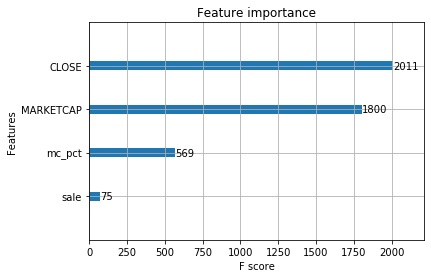

In [23]:
xgb.plot_importance(model)


# Predicting the future price using regression

### Reading in Data from Fidap

In [1]:
import pandas as pd, numpy as np
from fidap import fidap_client
import config
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, linear_model
fidap = fidap_client(api_key=config.FIDAP_API_KEY)

In [2]:
trading_data = fidap.sql("""
    select insider_trades.ticker, insider_trades.filingdate, insider_trades.transactionshares,
    insider_trades.transactionvalue, daily.close, daily.fc_1m, daily.marketcap
    from insider_trades, tickers, daily
    where 
    insider_trades.ticker = tickers.ticker and 
    insider_trades.ticker = daily.ticker and
    insider_trades.filingdate = daily.date and
    insider_trades.transactionvalue > 100000 and 
    insider_trades.securitytitle = 'Common Stock'
""")

In [3]:
trading_data.shape

(276005, 7)

## Split the Data into Train and Test (3:1)

In [6]:
trading_data.dropna(inplace=True)

In [9]:
trading_data = trading_data[trading_data.fc_1m < 1]

In [11]:
train_df, test_df = trading_data.iloc[:176813], trading_data.iloc[176813:]

In [12]:
# Describe data to see what kind of limits and bounds they have. Also determine statistical measures
train_df.describe()

,transactionshares,transactionvalue,close,fc_1m,marketcap
count,1.768130e+05,1.768130e+05,176813.000000,176813.000000,1.768130e+05
mean,-2.265709e+04,2.875126e+06,90.423904,0.008922,2.293588e+10
std,4.952773e+06,4.691886e+07,242.498413,0.132674,4.616407e+10
min,-1.805054e+08,1.000010e+05,0.002000,-0.827982,4.000000e+05
25%,-1.175000e+04,1.805230e+05,29.880000,-0.043918,1.758800e+09
50%,-3.678000e+03,3.524210e+05,57.120000,0.011177,5.517200e+09
75%,2.952000e+03,8.591020e+05,107.160000,0.065226,2.096280e+10
max,2.000000e+09,6.750000e+09,60600.000000,0.998261,4.304826e+11


In [13]:
train_df = train_df[train_df.fc_1m < 1]

In [14]:
# Do some data transformations and create some more columns
def create_features(data: pd.DataFrame):
    data_ = data.copy(deep=True)
    data_['mc_pct'] = data_['transactionvalue'] / data_['marketcap']
    data_['sale'] = np.where(data_['transactionshares'] > 0, 0, 1)
    return data_

In [15]:
train_df_mod = create_features(train_df)
test_df_mod = create_features(test_df)

In [16]:
train_df_mod.head()

,ticker,filingdate,transactionshares,transactionvalue,close,fc_1m,marketcap,mc_pct,sale
0,CMO,2016-02-03,13937,129893,9.47,0.033791,907500000.0,0.000143,0
1,CMO,2016-02-03,24881,231891,9.47,0.033791,907500000.0,0.000256,0
2,CMO,2016-02-03,17414,162298,9.47,0.033791,907500000.0,0.000179,0
3,CMO,2016-02-03,11105,103499,9.47,0.033791,907500000.0,0.000114,0
4,CMO,2018-01-04,43604,374994,8.66,-0.005774,832300000.0,0.000451,0


<AxesSubplot:>

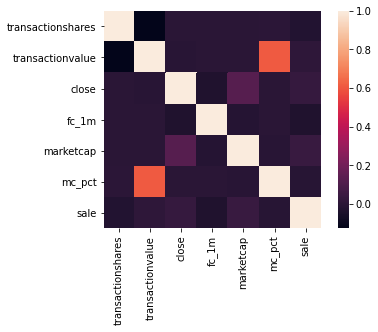

In [17]:
# check correlation between values in df
insider_trading_corr = train_df_mod.corr()
sns.heatmap(insider_trading_corr,square=True)

<AxesSubplot:xlabel='fc_1m', ylabel='Count'>

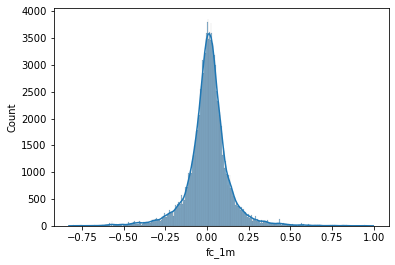

In [18]:
# From the above the fields are still correlated to the fc_1m, we will look at the fc_1m distribution
sns.histplot(train_df_mod['fc_1m'], kde=True)

In [19]:
features = ['ticker', 'sale', 'transactionshares', 'transactionvalue', 'close', 'marketcap', 'mc_pct']
labels = ['fc_1m']
insider_trading_train_features = train_df_mod[features].copy(deep=True)
insider_trading_train_labels = np.array(train_df_mod[labels])
insider_trading_test_features = test_df_mod[features].copy(deep=True)

In [20]:
encoder = preprocessing.OrdinalEncoder()
train_ticker = encoder.fit_transform(np.array(insider_trading_train_features['ticker']).reshape(-1, 1))
test_ticker = encoder.fit_transform(np.array(insider_trading_test_features['ticker']).reshape(-1, 1))

In [21]:
train_features_ = np.array(insider_trading_train_features[features[2:]])
test_features_ = np.array(insider_trading_test_features[features[2:]])
train_features = np.append(train_features_, train_ticker, axis=1)
test_features = np.append(test_features_, test_ticker, axis=1)

In [22]:
import numpy.random as nr
import sklearn.model_selection as ms
nr.seed(9988)
indx = range(train_features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = train_features[indx[0],:]
y_train = np.ravel(insider_trading_train_labels[indx[0]])
X_test = train_features[indx[1],:]
y_test = np.ravel(insider_trading_train_labels[indx[1]])

In [23]:
# Scale the numeric Features
scaler = preprocessing.StandardScaler().fit(X_train[:,2:])
X_train[:,2:] = scaler.transform(X_train[:,2:])
X_test[:,2:] = scaler.transform(X_test[:,2:])
test_features[:,2:] = scaler.transform(test_features[:,2:])

In [24]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [25]:
import sklearn.metrics as sklm
import scipy.stats as ss
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.017402973374233414
Root Mean Square Error = 0.1319203296472284
Mean Absolute Error    = 0.08678285942524669
Median Absolute Error  = 0.055329534651607004
R^2                    = -0.0038032290385208167
Adjusted R^2           = -0.004314446165124862


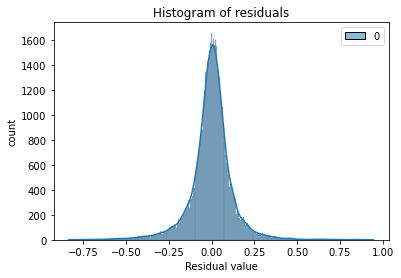

In [33]:
# Evaluate Residuals
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.histplot(resids, kde=True)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)

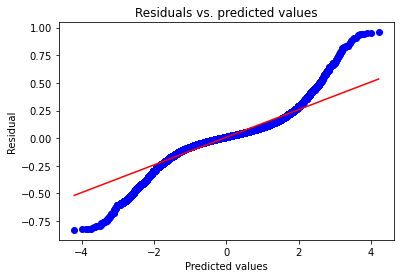

In [27]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

In [28]:
# Try XGBoost
import xgboost as xg

In [29]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 20, seed = 123) 
  
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
y_score = xgb_r.predict(X_test)

In [30]:
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.0157718249255842
Root Mean Square Error = 0.12558592646305636
Mean Absolute Error    = 0.08302365161684039
Median Absolute Error  = 0.05337794605048025
R^2                    = 0.09028138768677363
Adjusted R^2           = 0.08981808599421937
